In [56]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from scipy.stats import chi2_contingency


In [57]:
# Load the dataset
curr_directory= os.getcwd()
train_datapath= os.path.join(curr_directory, "Data", "train.csv")
train_df = pd.read_csv(train_datapath)

test_datapath= os.path.join(curr_directory, "Data", "test.csv")
test_df= pd.read_csv(test_datapath)

train_df.shape, test_df.shape

((800, 22), (200, 21))

In [58]:
train_df.columns


Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [59]:
# Identify the target column
[x for x in train_df.columns if x not in test_df.columns]

['Class/ASD']

In [60]:
train_df['relation'] = train_df['relation'].replace('?','Others')
train_df['ethnicity'] = train_df['ethnicity'].replace('?','others')

test_df['relation'] = test_df['relation'].replace('?','Others')
test_df['ethnicity'] = test_df['ethnicity'].replace('?','others')

In [61]:
train_df.drop(['used_app_before','age_desc'],axis=1,inplace=True)
test_df.drop(['used_app_before','age_desc'],axis=1,inplace=True)

In [62]:
# one hot encoding for categorical variables with only 2 unique values
train_df['jaundice'] = np.where(train_df['jaundice'] == 'yes',1,0)
test_df['jaundice'] = np.where(test_df['jaundice'] == 'yes',1,0)

train_df['austim'] = np.where(train_df['austim'] == 'yes',1,0)
test_df['austim'] = np.where(test_df['austim'] == 'yes',1,0)

In [63]:
# Label encoding based on frequency values of categorical variable
dict_ethnicity = dict(zip(train_df['ethnicity'].value_counts().index, range(1,train_df['ethnicity'].nunique()+1)))
train_df['ethnicity'] = train_df['ethnicity'].map(dict_ethnicity)
test_df['ethnicity'] = test_df['ethnicity'].map(dict_ethnicity)

In [64]:
col_name = 'contry_of_res'
dict_country = dict(zip(train_df[col_name].value_counts().index, range(1,train_df[col_name].nunique()+1)))
train_df[col_name] = train_df[col_name].map(dict_country)
test_df[col_name] = test_df[col_name].map(dict_country)

In [65]:
col_name = 'gender'
dict_gender = dict(zip(train_df[col_name].value_counts().index, range(1,train_df[col_name].nunique()+1)))
dict_gender

{'m': 1, 'f': 2}

In [66]:
train_df[col_name] = train_df[col_name].map(dict_gender)
test_df[col_name] = test_df[col_name].map(dict_gender)

In [67]:
col_name = 'relation'
dict_relation = dict(zip(train_df[col_name].value_counts().index, range(1,train_df[col_name].nunique()+1)))
train_df[col_name] = train_df[col_name].map(dict_relation)
test_df[col_name] = test_df[col_name].map(dict_relation)

In [74]:
print(train_df['gender'].unique())

[2 1]


### Testing Correlation
1. Correlation Matrix
2. Column Selection with Mutual information
3. Permutation Feature Importance

In [75]:
male_df = train_df[train_df['gender'] == 1]
female_df = train_df[train_df['gender'] == 2]

print("Male DataFrame shape:", male_df.shape)
print("Female DataFrame shape:", female_df.shape)

Male DataFrame shape: (530, 20)
Female DataFrame shape: (270, 20)


In [76]:
male_df = male_df.fillna(0)
female_df = female_df.fillna(0)

In [77]:
print(train_df.isnull().sum())

ID               0
A1_Score         0
A2_Score         0
A3_Score         0
A4_Score         0
A5_Score         0
A6_Score         0
A7_Score         0
A8_Score         0
A9_Score         0
A10_Score        0
age              0
gender           0
ethnicity        0
jaundice         0
austim           0
contry_of_res    0
result           0
relation         0
Class/ASD        0
dtype: int64


Male:
Class/ASD        1.000000
A6_Score         0.587882
A5_Score         0.513308
A4_Score         0.509623
A3_Score         0.501408
A9_Score         0.483436
A7_Score         0.479253
A2_Score         0.392590
austim           0.381094
result           0.352712
A10_Score        0.349172
A8_Score         0.324538
A1_Score         0.323093
jaundice         0.129983
age              0.067176
ID               0.045174
relation         0.041120
contry_of_res   -0.056995
ethnicity       -0.212011
gender                NaN
Name: Class/ASD, dtype: float64

Female:
Class/ASD        1.000000
A4_Score         0.484326
A6_Score         0.458057
A9_Score         0.424950
A7_Score         0.403037
A3_Score         0.384572
A5_Score         0.364024
result           0.350706
A10_Score        0.335102
A2_Score         0.334399
austim           0.315752
A8_Score         0.288784
A1_Score         0.257970
age              0.191138
jaundice         0.155821
ID               0.050954
contry_of_res   -

C:\Users\patel\AnacondaDistribution\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


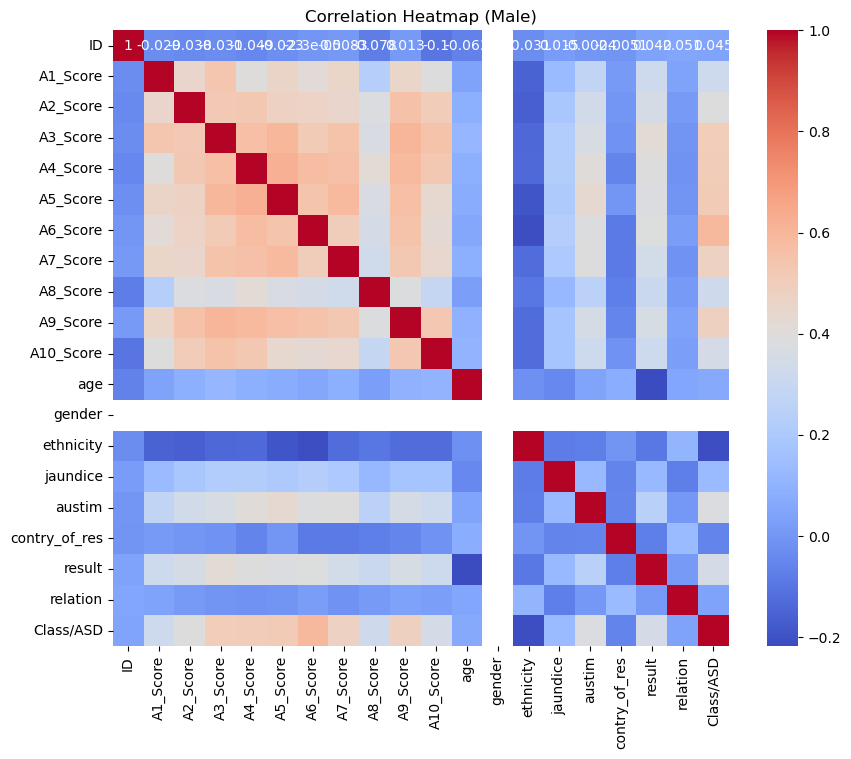

C:\Users\patel\AnacondaDistribution\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


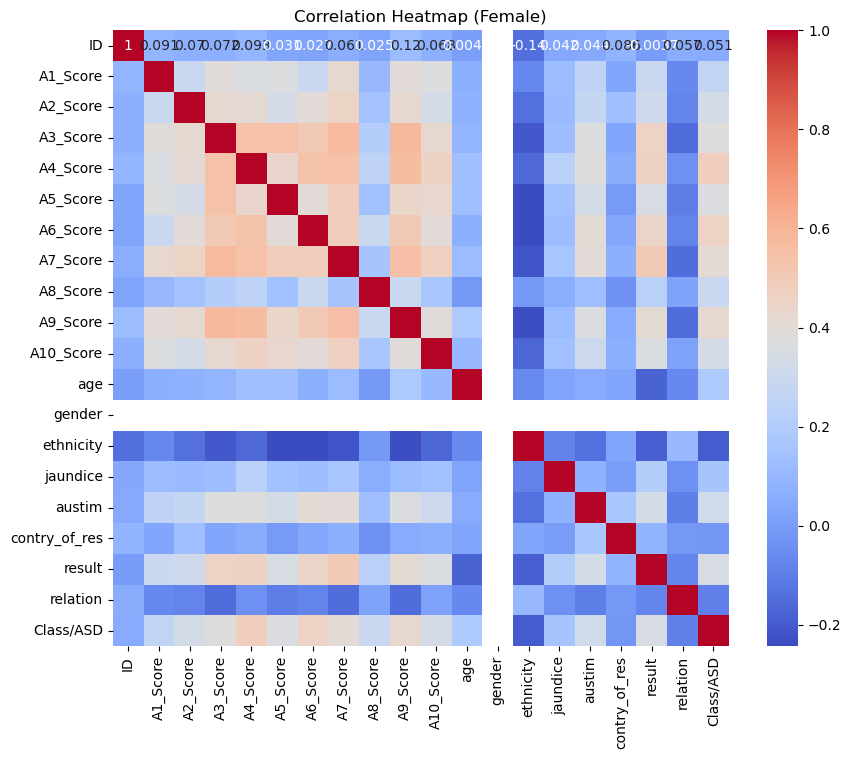

In [91]:
# Calculate the correlation for males and females
corr_male = male_df.corr()['Class/ASD'].sort_values(ascending=False)
corr_female = female_df.corr()['Class/ASD'].sort_values(ascending=False)

# Print the correlation of each feature, differentiated by gender
print("Male:")
print(corr_male)
print("\nFemale:")
print(corr_female)

# Plot the correlation heatmap, differentiated by gender
plt.figure(figsize=(10, 8))
sns.heatmap(male_df.corr(), annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap (Male)")
plt.savefig("correlation_heatmap_male.png")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(female_df.corr(), annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap (Female)")
plt.savefig("correlation_heatmap_female.png", )
plt.show()

Male:
austim           1.000000
A5_Score         0.429101
A4_Score         0.402084
A7_Score         0.391753
A6_Score         0.385469
Class/ASD        0.381094
A3_Score         0.366010
A9_Score         0.357145
A2_Score         0.336536
A10_Score        0.322728
A1_Score         0.274459
A8_Score         0.250730
result           0.239612
jaundice         0.126063
age              0.047670
relation         0.003951
ID              -0.002408
contry_of_res   -0.054309
ethnicity       -0.072710
gender                NaN
Name: austim, dtype: float64

Female:
austim           1.000000
A6_Score         0.403808
A7_Score         0.401141
A4_Score         0.381614
A3_Score         0.374283
A9_Score         0.366560
result           0.333942
A5_Score         0.332953
Class/ASD        0.315752
A10_Score        0.300963
A2_Score         0.275151
A1_Score         0.247324
contry_of_res    0.168188
A8_Score         0.135191
jaundice         0.077315
age              0.050705
ID               0.0

C:\Users\patel\AnacondaDistribution\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


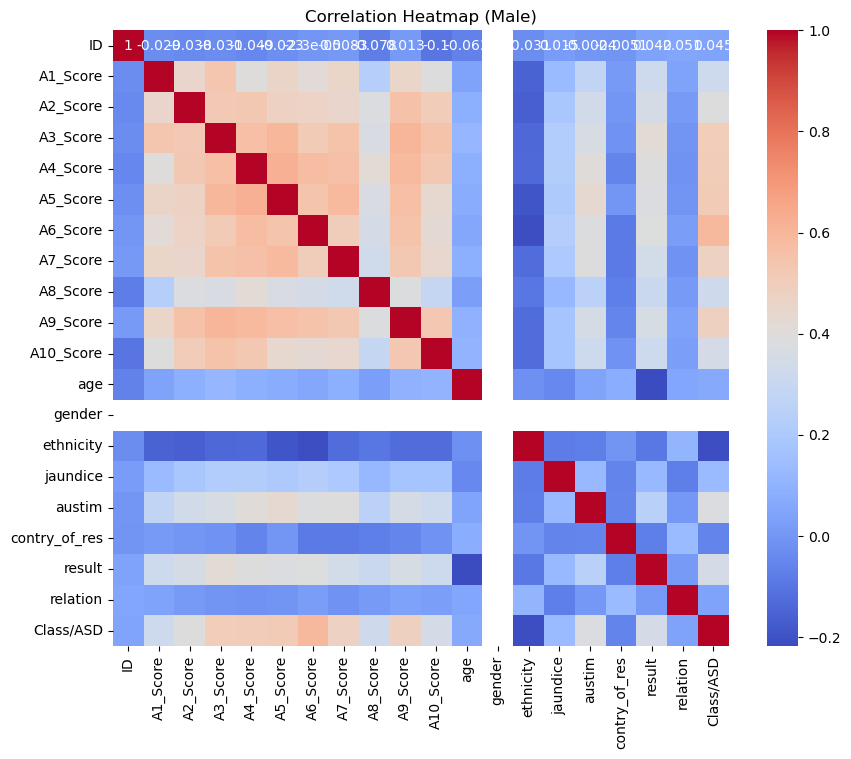

C:\Users\patel\AnacondaDistribution\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


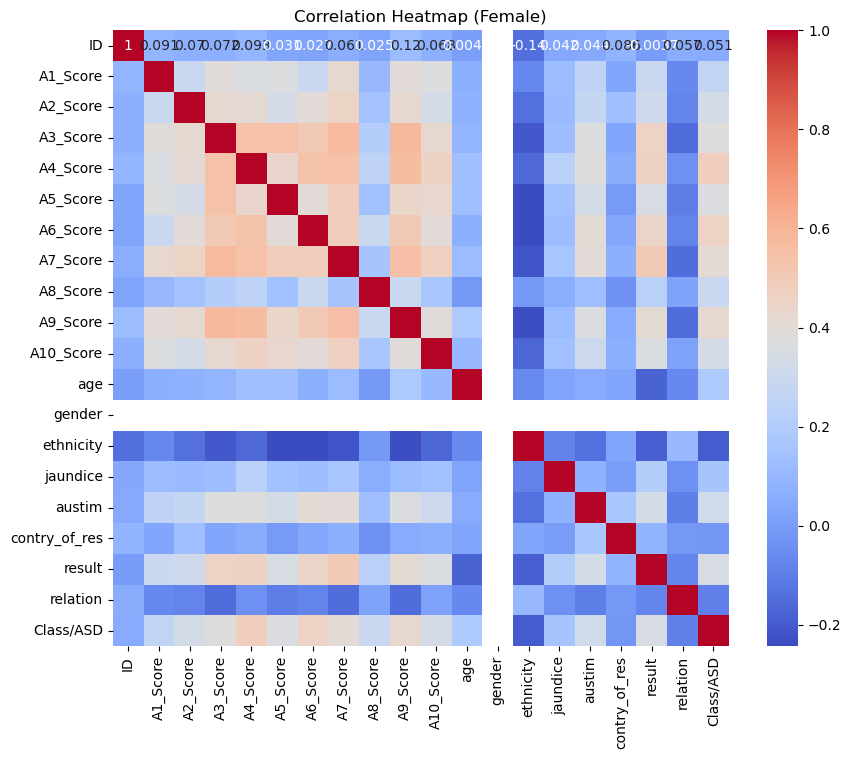

In [88]:
# Calculate the correlation for males and females
corr_male = male_df.corr()['austim'].sort_values(ascending=False)
corr_female = female_df.corr()['austim'].sort_values(ascending=False)

# Print the correlation of each feature, differentiated by gender
print("Male:")
print(corr_male)
print("\nFemale:")
print(corr_female)

# Plot the correlation heatmap, differentiated by gender
plt.figure(figsize=(10, 8))
sns.heatmap(male_df.corr(), annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap (Male)")
plt.savefig("correlation_heatmap_male.png")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(female_df.corr(), annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap (Female)")
plt.savefig("correlation_heatmap_female.png", )
plt.show()

In [81]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Function to calculate MUTUAL INFORMATION for a given gender
def calculate_mutual_info(df, gender_value):
    # Filter the DataFrame by gender
    gender_df = df[df['gender'] == gender_value]
    
    # Prepare the data
    X = gender_df.drop(columns=['Class/ASD', 'gender'])  # Features
    y = gender_df['Class/ASD']  # Target variable
    
    # Encode categorical variables if necessary
    X = pd.get_dummies(X)  # Convert categorical features to numerical if needed

    # Calculate Mutual Information
    mi_scores = mutual_info_classif(X, y, discrete_features='auto')

    # Create a DataFrame for the scores
    mi_scores_df = pd.DataFrame(mi_scores, index=X.columns, columns=['Mutual Information'])
    mi_scores_df = mi_scores_df.sort_values(by='Mutual Information', ascending=False)
    
    return mi_scores_df

# Calculate mutual information for females (gender = '2')
female_mi_scores = calculate_mutual_info(train_df, 2 )
print("Mutual Information for Females:")
print(female_mi_scores)

# Calculate mutual information for males (gender = '1')
male_mi_scores = calculate_mutual_info(train_df, 1)
print("\nMutual Information for Males:")
print(male_mi_scores)

# Select top features based on mutual information scores
top_n = 2  # Specify how many top features you want
top_female_features = female_mi_scores.head(top_n).index.tolist()
top_male_features = male_mi_scores.head(top_n).index.tolist()

print(f"\nTop {top_n} features for Females based on mutual information: {top_female_features}")
print(f"Top {top_n} features for Males based on mutual information: {top_male_features}")


Mutual Information for Females:
               Mutual Information
A9_Score                 0.135327
A10_Score                0.127331
A4_Score                 0.106237
A6_Score                 0.105765
contry_of_res            0.103113
A7_Score                 0.094687
result                   0.083192
ethnicity                0.078391
A3_Score                 0.070411
A5_Score                 0.070265
austim                   0.056962
A1_Score                 0.050127
ID                       0.044684
A2_Score                 0.028760
A8_Score                 0.028059
age                      0.016736
jaundice                 0.008069
relation                 0.005270

Mutual Information for Males:
               Mutual Information
A6_Score                 0.147229
A4_Score                 0.137134
A5_Score                 0.130197
A3_Score                 0.115280
A7_Score                 0.111248
ethnicity                0.108577
A9_Score                 0.108490
A2_Score           

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder


# Function to calculate PERMUTATION FEATURE importance for a given gender
def calculate_permutation_importance(df, gender_value):
    # Filter the DataFrame by gender
    gender_df = df[df['gender'] == gender_value]
    
    # Prepare the data
    X = gender_df.drop(columns=['Class/ASD', 'gender'])  # Features
    y = gender_df['Class/ASD']  # Target variable
    
    # Encode categorical variables if necessary
    X = pd.get_dummies(X)  # Convert categorical features to numerical if needed
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Random Forest Classifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Calculate Permutation Feature Importance
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

    # Create a DataFrame for the importance scores
    importance_df = pd.DataFrame(result.importances_mean, index=X.columns, columns=['Importance'])
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    
    return importance_df

# Calculate permutation feature importance for females (gender = '2')
female_importance = calculate_permutation_importance(train_df, 2)
print("Permutation Feature Importance for Females:")
print(female_importance)

# Calculate permutation feature importance for males (gender = '1')
male_importance = calculate_permutation_importance(train_df, 1)
print("\nPermutation Feature Importance for Males:")
print(male_importance)

# Select top features based on permutation importance scores
top_n = 2  # Specify how many top features you want
top_female_features = female_importance.head(top_n).index.tolist()
top_male_features = male_importance.head(top_n).index.tolist()

print(f"\nTop {top_n} features for Females based on permutation importance: {top_female_features}")
print(f"Top {top_n} features for Males based on permutation importance: {top_male_features}")

Permutation Feature Importance for Females:
               Importance
A4_Score         0.037037
ID               0.020370
ethnicity        0.011111
contry_of_res    0.007407
A8_Score         0.003704
austim           0.000000
jaundice         0.000000
A1_Score         0.000000
relation         0.000000
A7_Score         0.000000
A2_Score         0.000000
age             -0.009259
A6_Score        -0.011111
A5_Score        -0.011111
result          -0.012963
A10_Score       -0.014815
A3_Score        -0.016667
A9_Score        -0.027778

Permutation Feature Importance for Males:
               Importance
A9_Score         0.019811
A5_Score         0.017925
A6_Score         0.017925
A8_Score         0.006604
relation         0.000000
A4_Score        -0.003774
A1_Score        -0.004717
A10_Score       -0.005660
A2_Score        -0.007547
age             -0.007547
ethnicity       -0.007547
ID              -0.016981
contry_of_res   -0.017925
jaundice        -0.019811
austim          -0.019811
res